# Importing Libraries

In [147]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import time
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


# Importing Dataset

In [149]:
data = pd.read_csv("/content/hypothyroid (1).csv")

# EDA

In [150]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [152]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


###### Checking for null values

In [153]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [154]:
data.replace(to_replace='?', inplace=True, value=np.NaN)

In [155]:
data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [156]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [157]:
data["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [158]:
print("Unique categories in the column 'pregnant'", data['pregnant'].unique())
print("Count of categories in the column 'pregnant' \n", data["pregnant"].value_counts())

Unique categories in the column 'pregnant' ['f' 't']
Count of categories in the column 'pregnant' 
 f    3719
t      53
Name: pregnant, dtype: int64


In [159]:
print("Unique categories in the column 'T3 measured'", data['T3 measured'].unique())
print("Count of categories in the column 'T3 measured' \n", data["T3 measured"].value_counts())

Unique categories in the column 'T3 measured' ['t' 'f']
Count of categories in the column 'T3 measured' 
 t    3003
f     769
Name: T3 measured, dtype: int64


In [160]:
print("Unique categories in the column 'Sex'", data['sex'].unique())
print("Count of categories in the column 'Sex' \n", data["sex"].value_counts())

Unique categories in the column 'Sex' ['F' 'M' nan]
Count of categories in the column 'Sex' 
 F    2480
M    1142
Name: sex, dtype: int64


In [161]:
data = data.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})

In [162]:
data["binaryClass"] = data["binaryClass"].map({"P":0,"N":1})

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

###### Droping Unwanted Columns

In [164]:
data.drop('TBG', axis = 1, inplace=True)

In [165]:
data.drop('referral source', axis = 1, inplace=True)

In [166]:
columns = data.columns[data.dtypes.eq('object')]

data[columns] = data[columns].apply(pd.to_numeric, errors='coerce')

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

###### Replacing null values

In [168]:
data['age'].fillna(data['age'].mean(), inplace = True)
data['T4U'].fillna(data['T4U'].mean(), inplace = True)


data['TSH'].fillna(data['TSH'].mean(), inplace = True)
data['T3'].fillna(data['T3'].median(), inplace = True)
data['TT4'].fillna(data['TT4'].median(), inplace = True)
data['FTI'].fillna(data['FTI'].median(), inplace = True)


data['sex'].fillna(0, inplace = True)

In [169]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [170]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

# Data visualization

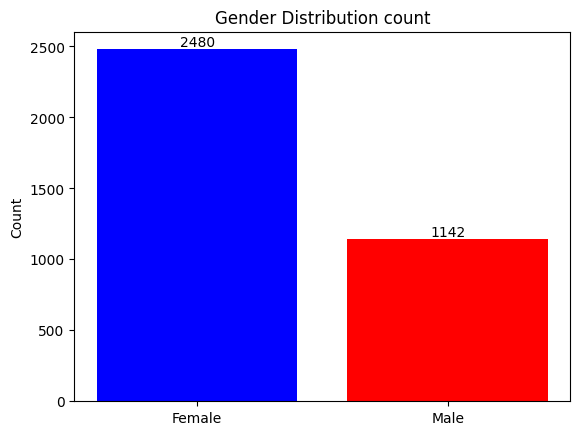

In [171]:
import matplotlib.pyplot as plt
labels = ['Female', 'Male']
counts = [2480, 1142]
plt.bar(labels, counts, color=['blue', 'red'])
plt.ylabel('Count')
plt.title('Gender Distribution count')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.show()

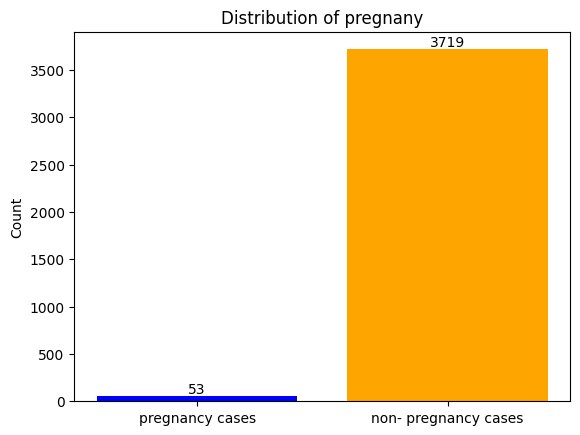

In [172]:
import matplotlib.pyplot as plt
labels = ['pregnancy cases', 'non- pregnancy cases']
counts = [53,3719]
plt.bar(labels, counts, color=['blue', 'orange'])
plt.ylabel('Count')
plt.title('Distribution of pregnany')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.show()

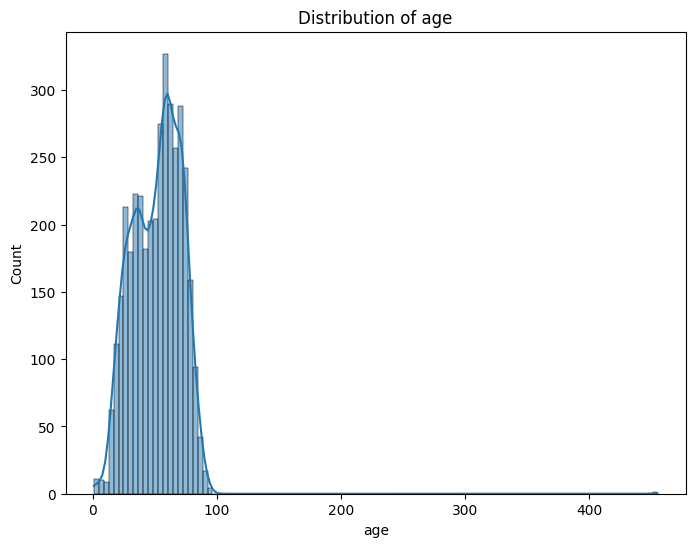

In [173]:
for column in ['age']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

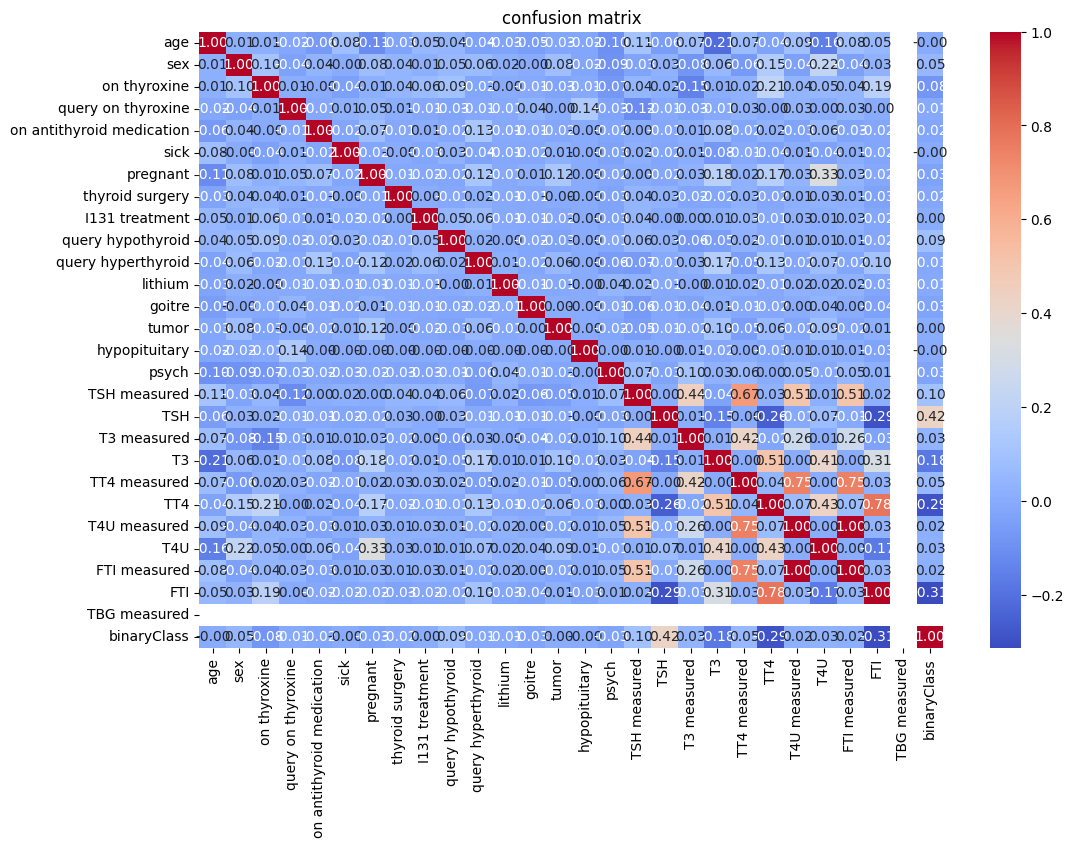

In [174]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('confusion matrix')
plt.show()

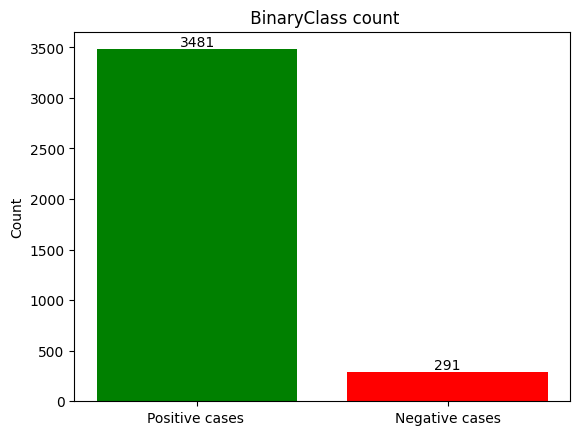

In [175]:
import matplotlib.pyplot as plt
labels = ['Positive cases ', 'Negative cases']
counts = [3481, 291]
plt.bar(labels, counts, color=['green', 'red'])
plt.ylabel('Count')
plt.title(' BinaryClass count')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.show()



# Splitting the dataset for training and testing

In [176]:
X = data.drop(['binaryClass'], axis = 1)
y = data.binaryClass
print(X.shape, y.shape)


#Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train:{X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

(3772, 27) (3772,)
Train:(3017, 27), (3017,)
Test: (755, 27), (755,)


In [177]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(f"Train:{X_train.shape}, {y_train.shape}")

Train:(5568, 27), (5568,)


In [178]:
pca = PCA(n_components=10)
X = pca.fit_transform(X)
print(X.shape,y.shape)

(3772, 10) (3772,)


In [179]:
# Print the shapes of the resampled training and the testing data
print(f"Train:{X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train:(5568, 27), (5568,)
Test: (755, 27), (755,)


In [180]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying Algorithms

In [181]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Naive Bayes

###### 1st case

In [217]:
gnb = GaussianNB()


param_grid = {

    'var_smoothing': [ 1e-9]
}


grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
gnb_time = end_time - start_time


para = grid_search.best_estimator_


print("Best Hyperparameters:", para)
y_pred = grid_search.predict(X_test)
a = accuracy_score(y_test, y_pred) * 100
p = precision_score(y_test,y_pred,average='macro') * 100
r = recall_score(y_test,y_pred,average='macro') * 100
f = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity = (true_positives / (true_positives + false_negatives)) * 100
specificity = (true_negatives / (true_negatives + false_positives)) * 100
auc_score = roc_auc_score(y_test, y_pred) * 100

print("Accuracy: {:.2f}%".format(a))
print("Precision: {:.2f}%".format(p))
print("Recall: {:.2f}%".format(r))
print("F1-score: {:.2f}%".format(f))
evaluate(grid_search,X_train, X_test, y_train, y_test)

Best Hyperparameters: GaussianNB()
Accuracy: 42.91%
Precision: 53.62%
Recall: 61.97%
F1-score: 37.30%
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1058 1726]
 [  47 2737]]
ACCURACY SCORE:
0.6816
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.957466     0.613265  0.681573     0.785365      0.785365
recall        0.380029     0.983118  0.681573     0.681573      0.681573
f1-score      0.544099     0.755347  0.681573     0.649723      0.649723
support    2784.000000  2784.000000  0.681573  5568.000000   5568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[275 422]
 [  9  49]]
ACCURACY SCORE:
0.4291
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.968310   0.104034  0.429139    0.536172      0.901915
recall       0.394548   0.844828  0.429139    0.619688      0.429139
f1-score     0.560652   0.185255  0.429139    0.372954      0.531814
support    697.000000  58.000000  0.429139 

**2nd Case**

In [218]:

gnb = GaussianNB()


param_grid = {

     'var_smoothing': [0.5, 1.0, 2.0, 5.0]
}


grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
gnb_time1 = end_time - start_time


para = grid_search.best_estimator_


print("Best Hyperparameters:", para)
evaluate(grid_search,X_train, X_test, y_train, y_test)
y_pred = grid_search.predict(X_test)
a1 = accuracy_score(y_test, y_pred) * 100
p1 = precision_score(y_test,y_pred,average='macro') * 100
r1 = recall_score(y_test,y_pred,average='macro') * 100
f1 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity1 = (true_positives / (true_positives + false_negatives)) * 100
specificity1 = (true_negatives / (true_negatives + false_positives)) * 100
auc_score1 = roc_auc_score(y_test, y_pred) * 100

print("Accuracy: {:.2f}%".format(a1))
print("Precision: {:.2f}%".format(p1))
print("Recall: {:.2f}%".format(r1))
print("F1-score: {:.2f}%".format(f1))


Best Hyperparameters: GaussianNB(var_smoothing=0.5)
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1147 1637]
 [  72 2712]]
ACCURACY SCORE:
0.6931
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.940935     0.623592  0.693068     0.782263      0.782263
recall        0.411997     0.974138  0.693068     0.693068      0.693068
f1-score      0.573070     0.760409  0.693068     0.666740      0.666740
support    2784.000000  2784.000000  0.693068  5568.000000   5568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[298 399]
 [ 10  48]]
ACCURACY SCORE:
0.4583
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.967532   0.107383  0.458278    0.537458      0.901455
recall       0.427547   0.827586  0.458278    0.627566      0.458278
f1-score     0.593035   0.190099  0.458278    0.391567      0.562081
support    697.000000  58.000000  0.458278  755.000000    755.000000
Accuracy: 45.83%
Precisi

3rd **Case**

In [219]:
gnb = GaussianNB()


param_grid = {

    'var_smoothing': [0.1, 0.5, 1.0, 2.0, 5.0]
}


grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
gnb_time1 = end_time - start_time


para = grid_search.best_estimator_


print("Best Hyperparameters:", para)
evaluate(grid_search,X_train, X_test, y_train, y_test)
y_pred = grid_search.predict(X_test)
a2 = accuracy_score(y_test, y_pred) * 100
p2 = precision_score(y_test,y_pred,average='macro') * 100
r2 = recall_score(y_test,y_pred,average='macro') * 100
f2 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity1 = (true_positives / (true_positives + false_negatives)) * 100
specificity1 = (true_negatives / (true_negatives + false_positives)) * 100
auc_score1 = roc_auc_score(y_test, y_pred) * 100

print("Accuracy: {:.2f}%".format(a2))
print("Precision: {:.2f}%".format(p2))
print("Recall: {:.2f}%".format(r2))
print("F1-score: {:.2f}%".format(f2))

Best Hyperparameters: GaussianNB(var_smoothing=0.1)
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1149 1635]
 [  78 2706]]
ACCURACY SCORE:
0.6923
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.936430     0.623359  0.692349     0.779894      0.779894
recall        0.412716     0.971983  0.692349     0.692349      0.692349
f1-score      0.572924     0.759579  0.692349     0.666252      0.666252
support    2784.000000  2784.000000  0.692349  5568.000000   5568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[299 398]
 [ 10  48]]
ACCURACY SCORE:
0.4596
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.967638   0.107623  0.459603    0.537630      0.901570
recall       0.428981   0.827586  0.459603    0.628284      0.459603
f1-score     0.594433   0.190476  0.459603    0.392455      0.563401
support    697.000000  58.000000  0.459603  755.000000    755.000000
Accuracy: 45.96%
Precisi

Naive Bayes BAR GRAPH RESULT FOR 3 CASES

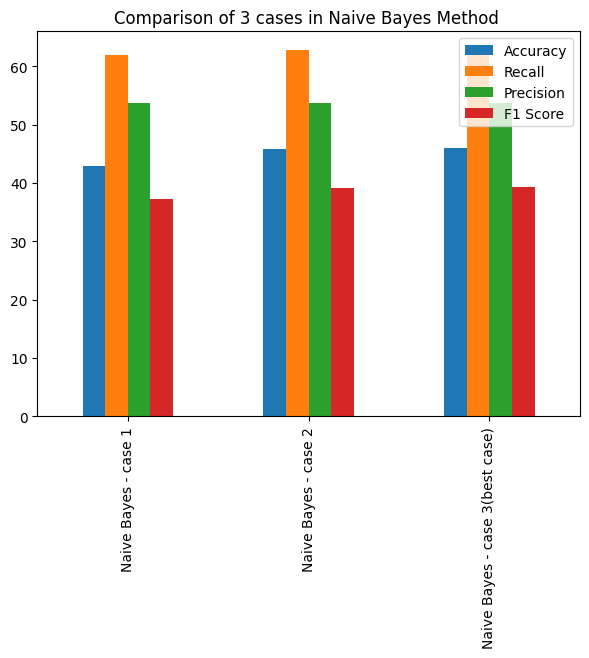

In [220]:
results = {'Accuracy': [a, a1,a2],
           'Recall': [r, r1, r2],
           'Precision': [p, p1,p2],
           'F1 Score': [f, f1,f2],}
index = ['Naive Bayes - case 1', 'Naive Bayes - case 2','Naive Bayes - case 3(best case)']
results =pd.DataFrame(results,index=index)

fig =results.plot(kind='bar',title='Comparison of 3 cases in Naive Bayes Method ',figsize =(7,5)).get_figure()

# Decision Tree

###### 1st method

In [221]:
dt = DecisionTreeClassifier()


param_grid = {
    'criterion': ['entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [1000],

}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
decision_time = end_time - start_time


para = grid_search.best_estimator_


print("Best Hyperparameters:", para)
y_pred = grid_search.predict(X_test)
a3 = accuracy_score(y_test, y_pred) * 100
p3 = precision_score(y_test,y_pred,average='macro') * 100
r3 = recall_score(y_test,y_pred,average='macro') * 100
f3 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity2 = (true_positives / (true_positives + false_negatives)) * 100
specificity2 = (true_negatives / (true_negatives + false_positives)) * 100
auc_score2 = roc_auc_score(y_test, y_pred) * 100

print("Accuracy: {:.2f}%".format(a3))
print("Precision: {:.2f}%".format(p3))
print("Recall: {:.2f}%".format(r3))
print("F1-score: {:.2f}%".format(f3))
evaluate(grid_search,X_train, X_test, y_train, y_test)

Best Hyperparameters: DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_samples_split=1000)
Accuracy: 99.74%
Precision: 99.86%
Recall: 98.28%
F1-score: 99.05%
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2781    3]
 [  32 2752]]
ACCURACY SCORE:
0.9937
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.988624     0.998911  0.993714     0.993768      0.993768
recall        0.998922     0.988506  0.993714     0.993714      0.993714
f1-score      0.993747     0.993681  0.993714     0.993714      0.993714
support    2784.000000  2784.000000  0.993714  5568.000000   5568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[697   0]
 [  2  56]]
ACCURACY SCORE:
0.9974
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.997139   1.000000  0.997351    0.998569      0.997359
recall       1.000000   0.965517  0.997351    0.982759      0.997351
f1-score     0.99856

###### 2nd Case

In [222]:
dt = DecisionTreeClassifier()


param_grid = {
    'criterion': ['entropy'],
    'max_depth': [1, 5, 10, 15, 20, 50, 100],
    'min_samples_split': [0.1, 0.3, 0.5, 0.6, 10, 20],
    'min_samples_leaf': [0, 2, 4, 15, 50]
}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
decision_time1 = end_time - start_time


para = grid_search.best_estimator_


print("Best Hyperparameters:", para)
evaluate(grid_search,X_train, X_test, y_train, y_test)
y_pred = grid_search.predict(X_test)
a4 = accuracy_score(y_test, y_pred) * 100
p4 = precision_score(y_test,y_pred,average='macro') * 100
r4 = recall_score(y_test,y_pred,average='macro') * 100
f4 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity3 = (true_positives / (true_positives + false_negatives)) * 100
specificity3 = (true_negatives / (true_negatives + false_positives)) * 100
auc_score3 = roc_auc_score(y_test, y_pred) * 100

print("Accuracy: {:.2f}%".format(a4))
print("Precision: {:.2f}%".format(p4))
print("Recall: {:.2f}%".format(r4))
print("F1-score: {:.2f}%".format(f4))

Best Hyperparameters: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=10)
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2779    5]
 [   2 2782]]
ACCURACY SCORE:
0.9987
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999281     0.998206  0.998743     0.998743      0.998743
recall        0.998204     0.999282  0.998743     0.998743      0.998743
f1-score      0.998742     0.998743  0.998743     0.998743      0.998743
support    2784.000000  2784.000000  0.998743  5568.000000   5568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[697   0]
 [  1  57]]
ACCURACY SCORE:
0.9987
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.998567   1.000000  0.998675    0.999284      0.998677
recall       1.000000   0.982759  0.998675    0.991379      0.998675
f1-score     0.999283   0.991304  0.998675    0.995294      0.998670
s

**3rd Case**

In [223]:
dt = DecisionTreeClassifier()

param_grid = {
    'min_samples_split': [0.01, 0.1, 0.3, 0.5, 0.6, 10, 20],
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
decision_time = end_time - start_time


para = grid_search.best_estimator_


print("Best Hyperparameters:", para)
y_pred = grid_search.predict(X_test)
a5 = accuracy_score(y_test, y_pred) * 100
p5 = precision_score(y_test,y_pred,average='macro') * 100
r5 = recall_score(y_test,y_pred,average='macro') * 100
f5 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity3 = (true_positives / (true_positives + false_negatives)) * 100
specificity3 = (true_negatives / (true_negatives + false_positives)) * 100
auc_score3 = roc_auc_score(y_test, y_pred) * 100

print("Accuracy: {:.2f}%".format(a5))
print("Precision: {:.2f}%".format(p5))
print("Recall: {:.2f}%".format(r5))
print("F1-score: {:.2f}%".format(f5))
evaluate(grid_search,X_train, X_test, y_train, y_test)

Best Hyperparameters: DecisionTreeClassifier(min_samples_split=10)
Accuracy: 99.60%
Precision: 98.98%
Recall: 98.20%
F1-score: 98.59%
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2782    2]
 [   2 2782]]
ACCURACY SCORE:
0.9993
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999282     0.999282  0.999282     0.999282      0.999282
recall        0.999282     0.999282  0.999282     0.999282      0.999282
f1-score      0.999282     0.999282  0.999282     0.999282      0.999282
support    2784.000000  2784.000000  0.999282  5568.000000   5568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[696   1]
 [  2  56]]
ACCURACY SCORE:
0.9960
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.997135   0.982456  0.996026    0.989795      0.996007
recall       0.998565   0.965517  0.996026    0.982041      0.996026
f1-score     0.997849   0.973913  0.996026    0.985881      0.996011
support    

Decision Tree BAR GRAPH RESULT FOR 3 CASES

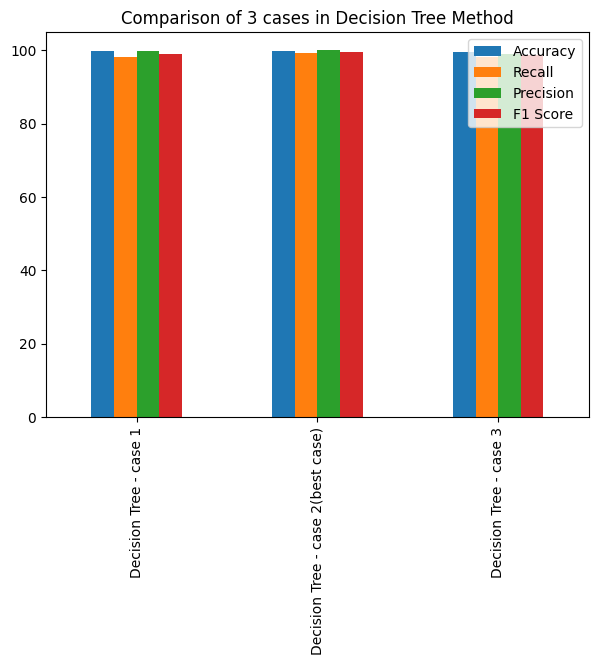

In [224]:
results = {'Accuracy': [a3, a4, a5],
           'Recall': [r3, r4, r5],
           'Precision': [p3, p4, p5],
           'F1 Score': [f3, f4, f5],}
index = ['Decision Tree - case 1', 'Decision Tree - case 2(best case)','Decision Tree - case 3']
results =pd.DataFrame(results,index=index)

fig =results.plot(kind='bar',title='Comparison of 3 cases in Decision Tree Method',figsize =(7,5)).get_figure()


# Linear Regression

###### 1st Method

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Create a Logistic Regression model
logistic_reg = LogisticRegression()

param_grid = {
    'C': [1000, 5000, 10000, 50000],  # Larger C values
    'solver': ['saga'],  # Use 'saga' solver for 'elasticnet'
    'l1_ratio': [0.2, 0.5, 0.8]  # Specify l1_ratio for elasticnet
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model to your training data
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your data

# Get the best estimator (model) from the grid search
best_logistic_reg = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_logistic_reg.predict(X_test)

# Calculate performance metrics
a6 = accuracy_score(y_test, y_pred) * 100
p6 = precision_score(y_test, y_pred, average='macro') * 100
r6 = recall_score(y_test, y_pred, average='macro') * 100
f6 = f1_score(y_test, y_pred, average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity5 = (true_positives / (true_positives + false_negatives)) * 100
specificity5 = (true_negatives / (true_negatives + false_positives)) * 100
auc_score5 = roc_auc_score(y_test, y_pred) * 100

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy : {:.2f}%".format(a6))
print("Precision : {:.2f}%".format(p6))
print("Recall : {:.2f}%".format(r6))
print("F1-score : {:.2f}%".format(f6))

evaluate(grid_search,X_train, X_test, y_train, y_test)


Best Hyperparameters: {'C': 1000, 'l1_ratio': 0.5, 'solver': 'saga'}
Accuracy : 85.70%
Precision : 65.01%
Recall : 81.98%
F1-score : 68.61%
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2409  375]
 [ 364 2420]]
ACCURACY SCORE:
0.8673
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.868734     0.865832  0.867277     0.867283      0.867283
recall        0.865302     0.869253  0.867277     0.867277      0.867277
f1-score      0.867015     0.867539  0.867277     0.867277      0.867277
support    2784.000000  2784.000000  0.867277  5568.000000   5568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[602  95]
 [ 13  45]]
ACCURACY SCORE:
0.8570
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.978862   0.321429  0.856954    0.650145      0.928357
recall       0.863702   0.775862  0.856954    0.819782      0.856954
f1-score     0.917683   0.454545  0.856954    0.686114      0.882104
suppo

**2nd case**

In [226]:

# Train Logistic Regression on the reduced feature set
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)
# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}
# Evaluate the model's performance
a7 = accuracy_score(y_test, y_pred) * 100
p7 = precision_score(y_test, y_pred, average='macro') * 100
r7 = recall_score(y_test, y_pred, average='macro') * 100
f7 = f1_score(y_test, y_pred, average='macro') * 100

conf_matrix_pca = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity5 = (true_positives / (true_positives + false_negatives)) * 100
specificity5 = (true_negatives / (true_negatives + false_positives)) * 100
auc_score5 = roc_auc_score(y_test, y_pred) * 100

print("Accuracy : {:.2f}%".format(a7))
print("Precision : {:.2f}%".format(p7))
print("Recall : {:.2f}%".format(r7))
print("F1-score : {:.2f}%".format(f7))
evaluate(grid_search,X_train, X_test, y_train, y_test)



Accuracy : 96.42%
Precision : 85.65%
Recall : 91.74%
F1-score : 88.39%
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2409  375]
 [ 364 2420]]
ACCURACY SCORE:
0.8673
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.868734     0.865832  0.867277     0.867283      0.867283
recall        0.865302     0.869253  0.867277     0.867277      0.867277
f1-score      0.867015     0.867539  0.867277     0.867277      0.867277
support    2784.000000  2784.000000  0.867277  5568.000000   5568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[602  95]
 [ 13  45]]
ACCURACY SCORE:
0.8570
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.978862   0.321429  0.856954    0.650145      0.928357
recall       0.863702   0.775862  0.856954    0.819782      0.856954
f1-score     0.917683   0.454545  0.856954    0.686114      0.882104
support    697.000000  58.000000  0.856954  755.000000    755.000000


3rd Case

In [227]:
logistic_reg = LogisticRegression()
param_grid = {
    'penalty': ['l2'],
    'C': [100],
    'solver': ['lbfgs'],
    'max_iter': [10000,]
}

grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
logistic_time = end_time - start_time

para = grid_search.best_estimator_

print("Best Hyperparameters:", para)
evaluate(grid_search,X_train, X_test, y_train, y_test)
y_pred = grid_search.predict(X_test)
a8 = accuracy_score(y_test, y_pred) * 100
p8 = precision_score(y_test,y_pred,average='macro') * 100
r8 = recall_score(y_test,y_pred,average='macro') * 100
f8 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity4 = (true_positives / (true_positives + false_negatives)) * 100
specificity4 = (true_negatives / (true_negatives + false_positives)) * 100
auc_score4 = roc_auc_score(y_test, y_pred) * 100

print("Accuracy: {:.2f}%".format(a8))
print("Precision: {:.2f}%".format(p8))
print("Recall: {:.2f}%".format(r8))
print("F1-score: {:.2f}%".format(f8))

plt.show()

Best Hyperparameters: LogisticRegression(C=100, max_iter=10000)
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2744   40]
 [  17 2767]]
ACCURACY SCORE:
0.9898
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.993843     0.985750  0.989763     0.989796      0.989796
recall        0.985632     0.993894  0.989763     0.989763      0.989763
f1-score      0.989720     0.989805  0.989763     0.989763      0.989763
support    2784.000000  2784.000000  0.989763  5568.000000   5568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[681  16]
 [  2  56]]
ACCURACY SCORE:
0.9762
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.997072   0.777778  0.976159    0.887425      0.980225
recall       0.977044   0.965517  0.976159    0.971281      0.976159
f1-score     0.986957   0.861538  0.976159    0.924247      0.977322
support    697.000000  58.000000  0.976159  755.000000    755.000000
Accuracy: 97

LOGISTIC REGRESSION BAR GRAPH RESULT FOR 3 CASES

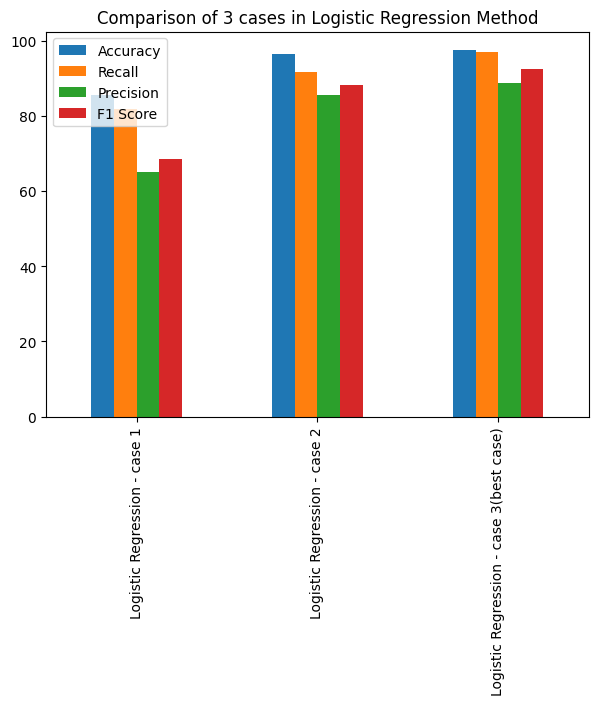

In [228]:
results = {'Accuracy': [a6, a7, a8],
           'Recall': [r6, r7, r8],
           'Precision': [p6, p7, p8],
           'F1 Score': [f6, f7, f8],}
index = [ 'Logistic Regression - case 1','Logistic Regression - case 2','Logistic Regression - case 3(best case)']
results =pd.DataFrame(results,index=index)

fig =results.plot(kind='bar',title='Comparison of 3 cases in Logistic Regression Method',figsize =(7,5)).get_figure()

**COMPARSION GRAPH**

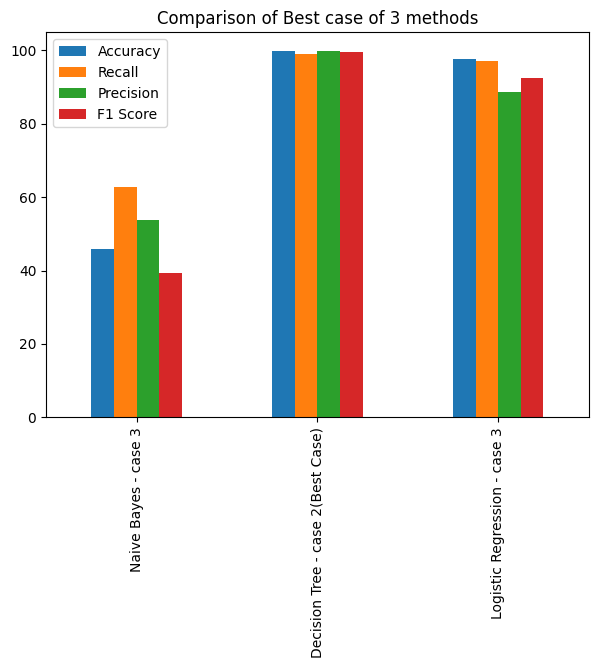

In [237]:
results = {'Accuracy': [a2, a4, a8],
           'Recall': [r2, r4, r8],
           'Precision': [p2, p4, p8],
           'F1 Score': [f2, f4, f8],}
index = [ 'Naive Bayes - case 3', 'Decision Tree - case 2(Best Case)', 'Logistic Regression - case 3']
results =pd.DataFrame(results,index=index)

fig =results.plot(kind='bar',title='Comparison of Best case of 3 methods',figsize =(7,5)).get_figure()

